<a href="https://colab.research.google.com/github/parthrjpt/EAS546_Projects/blob/DEV/Team11_CSE546_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time
import copy
import random
from collections import deque
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.autograd import Variable 

# Cartpole Environment

In [ ]:
env = gym.make("CartPole-v1")

In [ ]:
env = env
observation = env.reset()

In [ ]:
import gym, os
from itertools import count
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical



lr = 0.0001

class Actor(nn.Module):
    def __init__(self,):
        super(Actor, self).__init__()
        self.linear1 = nn.Linear(4, 128)
        self.linear2 = nn.Linear(128, 256)
        self.linear3 = nn.Linear(256, 2)

    def forward(self, state):
        output = F.relu(self.linear1(state))
        output = F.relu(self.linear2(output))
        output = self.linear3(output)
        distribution = Categorical(F.softmax(output, dim=-1))
        return distribution


class Critic(nn.Module):
    def __init__(self,):
        super(Critic, self).__init__()
        self.linear1 = nn.Linear(4, 128)
        self.linear2 = nn.Linear(128, 256)
        self.linear3 = nn.Linear(256, 1)

    def forward(self, state):
        output = F.relu(self.linear1(state))
        output = F.relu(self.linear2(output))
        value = self.linear3(output)
        return value


def compute_returns(next_value, rewards, masks, gamma=0.99):
    R = next_value
    returns = []
    for step in reversed(range(len(rewards))):
        R = rewards[step] + gamma * R * masks[step]
        returns.insert(0, R)
    return returns

<function matplotlib.pyplot.show>

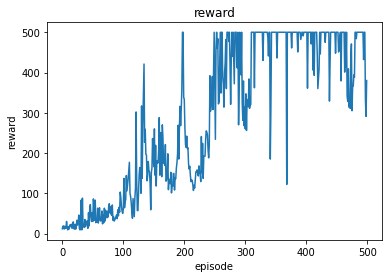

In [ ]:
actor=Actor()
critic=Critic()
returnplot=[]
n_iters=500
optimizerA = optim.Adam(actor.parameters())
optimizerC = optim.Adam(critic.parameters())

#agent=A2CAgent(env)
for iter in range(n_iters):
    state= env.reset()
    cumulativereward=0
    state= torch.FloatTensor(state)
    log_probs = []
    values = []
    rewards = []
    masks = []
    entropy = 0
    for i in count():
        state= torch.FloatTensor(state)
        dist, value = actor(state), critic(state)
        action = dist.sample()
        next_state, reward, done, _ = env.step(action.numpy())

        log_prob = dist.log_prob(action).unsqueeze(0)
        entropy += dist.entropy().mean()

        log_probs.append(log_prob)
        values.append(value)
        cumulativereward+=reward
        rewards.append(torch.tensor([reward], dtype=torch.float))
        masks.append(torch.tensor([1-done], dtype=torch.float))

        state = next_state

        if done:
            break


    next_state = torch.FloatTensor(next_state)
    next_value = critic(next_state)
    returns = compute_returns(next_value, rewards, masks)
    returnplot.append(cumulativereward)
    log_probs = torch.cat(log_probs)
    returns = torch.cat(returns).detach()
    #print(returns)
    values = torch.cat(values)

    advantage = returns - values

    actor_loss = -(log_probs * advantage.detach()).mean()
    critic_loss = advantage.pow(2).mean()

    optimizerA.zero_grad()
    optimizerC.zero_grad()
    actor_loss.backward()
    critic_loss.backward()
    optimizerA.step()
    optimizerC.step()
env.close()
plt.plot(returnplot)
plt.title('reward')
plt.xlabel('episode')
plt.ylabel('reward')
plt.show  
#env.monitor.close()

# LunarLander

In [ ]:
! pip install Box2D


     |████████████████████████████████| 1.3MB 6.7MB/s 


In [ ]:
env = gym.make("LunarLander-v2")

In [ ]:
env.observation_space.shape

(8,)

In [ ]:
import gym, os
from itertools import count
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical



lr = 0.01

class Actor(nn.Module):
    def __init__(self,):
        super(Actor, self).__init__()
        self.linear1 = nn.Linear(8, 128)
        self.linear2 = nn.Linear(128, 256)
        self.linear3 = nn.Linear(256, 4)

    def forward(self, state):
        output = F.relu(self.linear1(state))
        output = F.relu(self.linear2(output))
        output = self.linear3(output)
        distribution = Categorical(F.softmax(output, dim=-1))
        return distribution


class Critic(nn.Module):
    def __init__(self,):
        super(Critic, self).__init__()
        self.linear1 = nn.Linear(8, 128)
        self.linear2 = nn.Linear(128, 256)
        self.linear3 = nn.Linear(256, 1)

    def forward(self, state):
        output = F.relu(self.linear1(state))
        output = F.relu(self.linear2(output))
        value = self.linear3(output)
        return value


def compute_returns(next_value, rewards, masks, gamma=0.99):
    R = next_value
    returns = []
    for step in reversed(range(len(rewards))):
        R = rewards[step] + gamma * R * masks[step]
        returns.insert(0, R)
    return returns

<function matplotlib.pyplot.show>

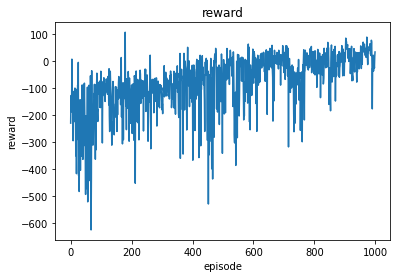

In [ ]:
actor=Actor()
critic=Critic()
returnplot=[]
n_iters=1000
optimizerA = optim.Adam(actor.parameters())
optimizerC = optim.Adam(critic.parameters())

#agent=A2CAgent(env)
for iter in range(n_iters):
    state= env.reset()
    cumulativereward=0
    state= torch.FloatTensor(state)
    log_probs = []
    values = []
    rewards = []
    masks = []
    entropy = 0
    for i in count():
        state= torch.FloatTensor(state)
        #print(state)
        dist, value = actor(state), critic(state)
        action = dist.sample()
        next_state, reward, done, _ = env.step(action.numpy())

        log_prob = dist.log_prob(action).unsqueeze(0)
        entropy += dist.entropy().mean()

        log_probs.append(log_prob)
        values.append(value)
        cumulativereward+=reward
        rewards.append(torch.tensor([reward], dtype=torch.float))
        masks.append(torch.tensor([1-done], dtype=torch.float))

        state = next_state
        if done:
            break


    next_state = torch.FloatTensor(next_state)
    next_value = critic(next_state)
    returns = compute_returns(next_value, rewards, masks)
    returnplot.append(cumulativereward)
    log_probs = torch.cat(log_probs)
    returns = torch.cat(returns).detach()
    #print(returns)
    values = torch.cat(values)

    advantage = returns - values

    actor_loss = -(log_probs * advantage.detach()).mean()
    critic_loss = advantage.pow(2).mean()

    optimizerA.zero_grad()
    optimizerC.zero_grad()
    actor_loss.backward()
    critic_loss.backward()
    optimizerA.step()
    optimizerC.step()
env.close()
plt.plot(returnplot)
plt.title('reward')
plt.xlabel('episode')
plt.ylabel('reward')
plt.show  
#env.monitor.close()

# Acrobot

In [ ]:
env = gym.make("Acrobot-v1")

In [ ]:
env.observation_space.sample()

array([  0.3979476,   0.9814587,   0.877324 ,  -0.2302985,  -5.8014946,
       -20.164982 ], dtype=float32)

In [ ]:
import gym, os
from itertools import count
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical



lr = 0.01

class Actor(nn.Module):
    def __init__(self,):
        super(Actor, self).__init__()
        self.linear1 = nn.Linear(6, 128)
        self.linear2 = nn.Linear(128, 256)
        self.linear3 = nn.Linear(256, 3)

    def forward(self, state):
        output = F.relu(self.linear1(state))
        output = F.relu(self.linear2(output))
        output = self.linear3(output)
        distribution = Categorical(F.softmax(output, dim=-1))
        return distribution


class Critic(nn.Module):
    def __init__(self,):
        super(Critic, self).__init__()
        self.linear1 = nn.Linear(6, 128)
        self.linear2 = nn.Linear(128, 256)
        self.linear3 = nn.Linear(256, 1)

    def forward(self, state):
        output = F.relu(self.linear1(state))
        output = F.relu(self.linear2(output))
        value = self.linear3(output)
        return value


def compute_returns(next_value, rewards, masks, gamma=0.99):
    R = next_value
    returns = []
    for step in reversed(range(len(rewards))):
        R = rewards[step] + gamma * R * masks[step]
        returns.insert(0, R)
    return returns

<function matplotlib.pyplot.show>

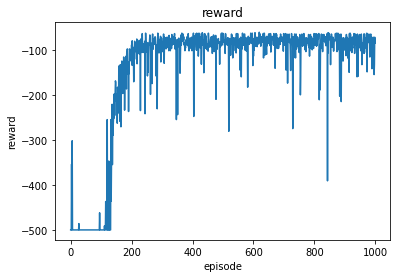

In [ ]:
actor=Actor()
critic=Critic()
returnplot=[]
n_iters=1000
optimizerA = optim.Adam(actor.parameters())
optimizerC = optim.Adam(critic.parameters())

#agent=A2CAgent(env)
for iter in range(n_iters):
    state= env.reset()
    cumulativereward=0
    state= torch.FloatTensor(state)
    log_probs = []
    values = []
    rewards = []
    masks = []
    entropy = 0
    for i in count():
        state= torch.FloatTensor(state)
        dist, value = actor(state), critic(state)
        action = dist.sample()
        next_state, reward, done, _ = env.step(action.numpy())

        log_prob = dist.log_prob(action).unsqueeze(0)
        entropy += dist.entropy().mean()

        log_probs.append(log_prob)
        values.append(value)
        cumulativereward+=reward
        rewards.append(torch.tensor([reward], dtype=torch.float))
        masks.append(torch.tensor([1-done], dtype=torch.float))

        state = next_state

        if done:
            break


    next_state = torch.FloatTensor(next_state)
    next_value = critic(next_state)
    returns = compute_returns(next_value, rewards, masks)
    returnplot.append(cumulativereward)
    log_probs = torch.cat(log_probs)
    returns = torch.cat(returns).detach()
    #print(returns)
    values = torch.cat(values)

    advantage = returns - values

    actor_loss = -(log_probs * advantage.detach()).mean()
    critic_loss = advantage.pow(2).mean()

    optimizerA.zero_grad()
    optimizerC.zero_grad()
    actor_loss.backward()
    critic_loss.backward()
    optimizerA.step()
    optimizerC.step()
env.close()
plt.plot(returnplot)
plt.title('reward')
plt.xlabel('episode')
plt.ylabel('reward')
plt.show  
#env.monitor.close()